## Pesticide and Insecticide Usage

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [4]:
df = pd.read_csv('/Users/aathik/Documents/Uwin/ADT/Project/Notebooks2/PROJECT-ADT/pesticide.csv')

#### Data Preprocessing

In [12]:
df.head()

,Area,Item,Year,Value
0,India,Insecticides,2000,26227.25
1,India,Pesticides (total),2000,44957.52
2,Madagascar,Insecticides,2000,59.45
3,Madagascar,Pesticides (total),2000,130.46
4,Mexico,Insecticides,2000,5852.18


In [13]:
unique_values = df['Item'].unique()
print(unique_values)

['Insecticides' 'Pesticides (total)']


In [14]:
# Filter rows with Insecticides
insecticide_df = df[df['Item'] == 'Insecticides']

# Filter rows with Pesticides (total)
pesticide_df = df[df['Item'] == 'Pesticides (total)']

insecticide_df.head()

,Area,Item,Year,Value
0,India,Insecticides,2000,26227.25
2,Madagascar,Insecticides,2000,59.45
4,Mexico,Insecticides,2000,5852.18
6,Papua New Guinea,Insecticides,2000,2.24
8,Romania,Insecticides,2000,1239.30


In [15]:
pesticide_df.head()

,Area,Item,Year,Value
1,India,Pesticides (total),2000,44957.52
3,Madagascar,Pesticides (total),2000,130.46
5,Mexico,Pesticides (total),2000,26624.98
7,Papua New Guinea,Pesticides (total),2000,235.47
9,Romania,Pesticides (total),2000,9427.40


In [16]:
insecticide_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 207
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    104 non-null    object 
 1   Item    104 non-null    object 
 2   Year    104 non-null    int64  
 3   Value   104 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.1+ KB


#### Analysis

<Figure size 1000x600 with 0 Axes>

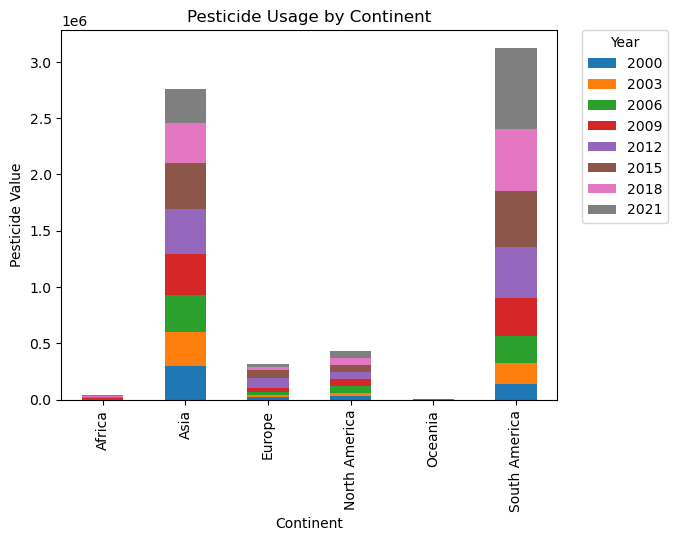

In [21]:
continent_mapping = {
    'Africa': ['Algeria', 'Morocco', 'Cabo Verde', 'Mauritius', 'Democratic Republic of the Congo',
               'Chad', 'Central African Republic', 'Burundi', 'Comoros', 'South Sudan', 'Somalia'],
    'North America': ['Mexico', 'Jamaica', 'Trinidad & Tobago', 'Honduras', 'Nicaragua', 'Haiti',
                      'Cuba', 'Costa Rica', 'Dominican Republic', 'Guatemala'],
    'South America': ['Brazil', 'Venezuela', 'Suriname', 'Guyana',
                      'Bolivia (Plurinat. State of)', 'Ecuador','Chile','Uruguay','Argentina','Paraguay'],
    'Asia': ['China', 'Kuwait', 'Turkey', 'Uzbekistan', 'Mongolia', 'Korea (DPR)', 'India',
             'Afghanistan', 'Timor-Leste', 'Yemen'],
    'Oceania': ['Fiji', 'Solomon Islands', 'Papua New Guinea'],
    'Europe': ['Belarus', 'Bosnia & Herzegovina', 'Croatia', 'Estonia', 'Latvia', 'Bulgaria',
               'Albania', 'Russian Federation', 'Ukraine', 'Moldova (Republic of)']
}

# Create a new DataFrame with the mean pesticide values for each continent and year
continent_mean_df = pesticide_df.groupby(['Area', 'Year'])['Value'].mean().reset_index()

# Add a new column 'Continent' to the DataFrame based on the continent mapping
continent_mean_df['Continent'] = continent_mean_df['Area'].map({country: continent for continent, countries in continent_mapping.items() for country in countries})

# Pivot the data to have years as columns and pesticide values as values
pivot_df = continent_mean_df.pivot_table(index='Continent', columns='Year', values='Value', aggfunc='sum')

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.title('Pesticide Usage by Continent')
plt.xlabel('Continent')
plt.ylabel('Pesticide Value')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

<Figure size 1000x600 with 0 Axes>

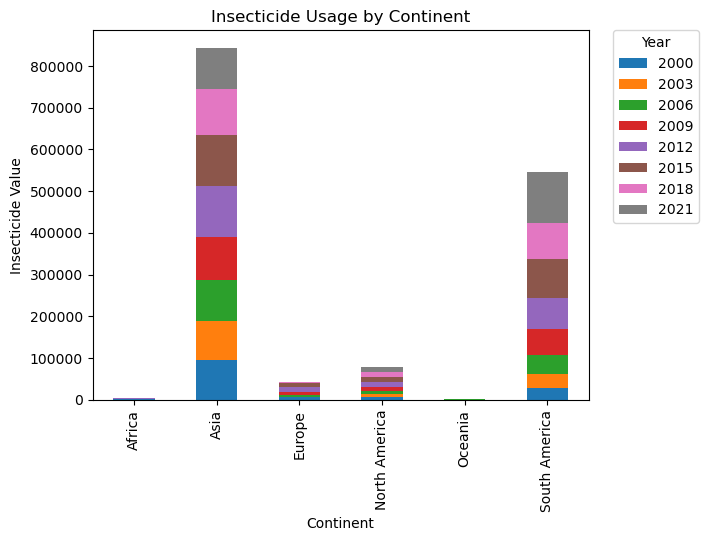

In [22]:
continent_mapping = {
    'Africa': ['Algeria', 'Morocco', 'Cabo Verde', 'Mauritius', 'Democratic Republic of the Congo',
               'Chad', 'Central African Republic', 'Burundi', 'Comoros', 'South Sudan', 'Somalia'],
    'North America': ['Mexico', 'Jamaica', 'Trinidad & Tobago', 'Honduras', 'Nicaragua', 'Haiti',
                      'Cuba', 'Costa Rica', 'Dominican Republic', 'Guatemala'],
    'South America': ['Brazil', 'Venezuela', 'Suriname', 'Guyana',
                      'Bolivia (Plurinat. State of)', 'Ecuador','Chile','Uruguay','Argentina','Paraguay'],
    'Asia': ['China', 'Kuwait', 'Turkey', 'Uzbekistan', 'Mongolia', 'Korea (DPR)', 'India',
             'Afghanistan', 'Timor-Leste', 'Yemen'],
    'Oceania': ['Fiji', 'Solomon Islands', 'Papua New Guinea'],
    'Europe': ['Belarus', 'Bosnia & Herzegovina', 'Croatia', 'Estonia', 'Latvia', 'Bulgaria',
               'Albania', 'Russian Federation', 'Ukraine', 'Moldova (Republic of)']
}

# Create a new DataFrame with the mean pesticide values for each continent and year
continent_mean_df = insecticide_df.groupby(['Area', 'Year'])['Value'].mean().reset_index()

# Add a new column 'Continent' to the DataFrame based on the continent mapping
continent_mean_df['Continent'] = continent_mean_df['Area'].map({country: continent for continent, countries in continent_mapping.items() for country in countries})

# Pivot the data to have years as columns and pesticide values as values
pivot_df = continent_mean_df.pivot_table(index='Continent', columns='Year', values='Value', aggfunc='sum')

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.title('Insecticide Usage by Continent')
plt.xlabel('Continent')
plt.ylabel('Insecticide Value')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()